# Pymaceuticals Inc.
---

### Analysis

1. There 40.9% of females and 50.4% males in this study.
2. The drug regimen with Ramicane resulted in the lowest average tumor size.
3. Only the data for Infubinol had 1 outlier.
4. There is a strong correlation between the mouse weight and average tumor volume for the Capomulin regimen.

 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

# Combine the data into a single dataset
masterdf = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
masterdf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Checking the number of mice.
masterdf['Mouse ID'].nunique()

249

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = masterdf[masterdf.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicatemice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemouse = masterdf[masterdf.duplicated()]
duplicatemouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
masterdf = masterdf[masterdf['Mouse ID'] != 'g989']

In [37]:
# Checking the number of mice in the clean DataFrame.
masterdf['Mouse ID'].nunique()

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groupdata = masterdf.groupby("Drug Regimen")
groupdata.head()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
meantumor = groupdata['Tumor Volume (mm3)'].mean()
medtumor  = groupdata['Tumor Volume (mm3)'].median()
vartumor  = groupdata['Tumor Volume (mm3)'].var()
stdtumor  = groupdata['Tumor Volume (mm3)'].std()
semtumor  = groupdata['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summarystats = pd.DataFrame(({'Mean Tumor Vol.'     : meantumor,
                              'Median Tumor Vol.'   : medtumor,
                              'Variance Tumor Vol.' : vartumor,
                              'Std Dev Tumor Vol.'  : stdtumor,
                              'SEM Tumor Vol.'      : semtumor}))
summarystats



,Mean Tumor Vol.,Median Tumor Vol.,Variance Tumor Vol.,Std Dev Tumor Vol.,SEM Tumor Vol.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
groupdata['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoints Per Drug Regimen')

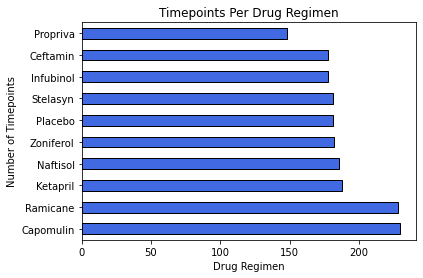

In [39]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# I chose the horizontal bar chart to read better the drugs used.
bargraph = masterdf['Drug Regimen'].value_counts().plot.barh(color='royalblue', edgecolor='black')
bargraph.set_xlabel("Drug Regimen")
bargraph.set_ylabel("Number of Timepoints")
bargraph.set_title("Timepoints Per Drug Regimen")

Text(0.5, 0.98, 'Timepoints Per Drug Regimen')

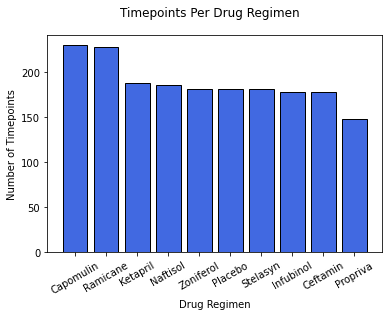

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = masterdf["Drug Regimen"].value_counts()
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color='royalblue', alpha=1, edgecolor='black', label='Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
tick_names = [value for value in x_axis]
plt.xticks(tick_names, y_axis.index.values, rotation=30)
plt.suptitle("Timepoints Per Drug Regimen")

<AxesSubplot:>

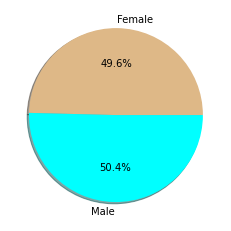

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

females = masterdf.loc[masterdf["Sex"] == "Female"]
female_count = females["Mouse ID"].nunique()
males = masterdf.loc[masterdf["Sex"] == 'Male']
male_count = males['Mouse ID'].nunique()
sex_data = [["Females", int(female_count)], ['Males', int(male_count)]]
sex_df = pd.DataFrame(sex_data, columns=['Sex', 'Count'])
sex_df = sex_df.set_index('Sex')
pie_labels = ['Female', 'Male']
pie_colors = ['burlywood', 'cyan']
sex_df.plot(kind='pie', y='Count', ylabel="", shadow=True, autopct='%1.1f%%', colors=pie_colors, 
            legend = False, labels=pie_labels)


([<matplotlib.patches.Wedge at 0x15fda1ef1c0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

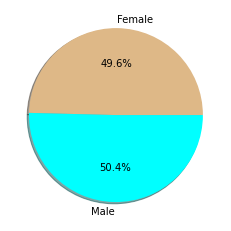

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_list = [female_count, male_count]
plt.pie(sex_list, labels=pie_labels, shadow=True, colors=pie_colors, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_test = masterdf.groupby(['Mouse ID']).agg(Timepoint=('Timepoint', 'max')).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_testdf = last_test.merge(masterdf, how='inner', on=['Mouse ID', 'Timepoint'])
last_testdf.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = dict()

for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = last_testdf.loc[last_testdf['Drug Regimen'].isin([drug])].reset_index(drop=True)
    drugvol = drug_df['Tumor Volume (mm3)'].tolist()
    tumorvol[drug] = drugvol 
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles   = drug_df.quantile([.25, .5, .75]).reset_index(drop=True)
    lowerq      = quartiles.iloc[0]['Tumor Volume (mm3)']
    upperq      = quartiles.iloc[2]['Tumor Volume (mm3)']
    iqr         = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers    = drug_df[((drug_df['Tumor Volume (mm3)'] < lower_bound) | 
                           (drug_df['Tumor Volume (mm3)'] > upper_bound))]
    
    if len(outliers) > 0: 
        print(drug + " has " + str(len(outliers)) +" outlier.")
    else:
        print(drug + " doesn't have outliers.")
  

Capomulin doesn't have outliers.
Ramicane doesn't have outliers.
Infubinol has 1 outlier.
Ceftamin doesn't have outliers.


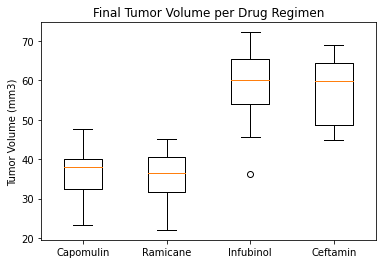

In [101]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumorvol.values())
ax.set_xticklabels(tumorvol.keys())
plt.title('Final Tumor Volume per Drug Regimen')  
plt.ylabel('Tumor Volume (mm3)')  
plt.show()

## Line and Scatter Plots

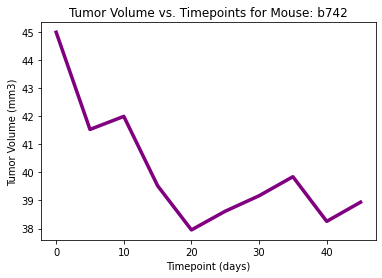

In [164]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Getting the data of only Capomulin last tests
capomulin_df = last_testdf[last_testdf["Drug Regimen"].isin(["Capomulin"])].reset_index()

# Choosing a random row from the Capulin data
mouse_row = capomulin_df.sample()

# Print mouse_row to find the Mouse ID to use for this plot
mouse_row

# I found b742 
mouse_data = masterdf[masterdf["Mouse ID"] == "b742"].reset_index(drop=True)
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linewidth = 3.5, color = "purple")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timepoints for Mouse: b742")  
plt.show()


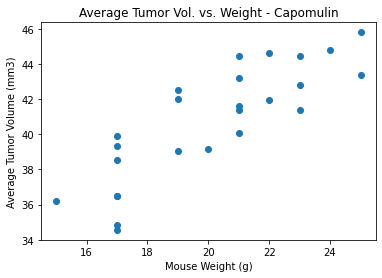

In [165]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_drugdf = masterdf[masterdf["Drug Regimen"].isin(['Capomulin'])].reset_index(drop=True)
capomulin_avg = capomulin_drugdf.groupby(["Mouse ID", "Weight (g)"]).agg(
                    avg_tumor_size = ('Tumor Volume (mm3)', 'mean')).reset_index()

plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['avg_tumor_size'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Vol. vs. Weight - Capomulin")
plt.show()


## Correlation and Regression

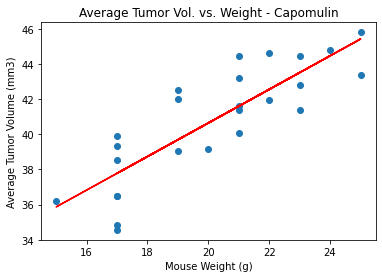

In [166]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg['Weight (g)'], capomulin_avg['avg_tumor_size'])
regress_values = (capomulin_avg['Weight (g)'] * slope + intercept)
plt.plot(capomulin_avg['Weight (g)'], regress_values, "r-")
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['avg_tumor_size'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Vol. vs. Weight - Capomulin")
plt.show()